# IMDB Dataset

FOr this project, we will use the Large Movie Review Dataset The code below downloads the data, unzips it, and uses it to create Keras dataset objects.

In [53]:
import re
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import re

In [1]:
!wget 'https://storage.googleapis.com/wd13/imdb_data.zip'

--2023-11-12 20:45:18--  https://storage.googleapis.com/wd13/imdb_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64200274 (61M) [application/zip]
Saving to: ‘imdb_data.zip’

imdb_data.zip       100%[===================>]  61.23M   159MB/s    in 0.4s    

2023-11-12 20:45:19 (159 MB/s) - ‘imdb_data.zip’ saved [64200274/64200274]



In [2]:
!unzip "imdb_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: imdb_data/train/pos/9260_7.txt  
  inflating: __MACOSX/imdb_data/train/pos/._9260_7.txt  
  inflating: imdb_data/train/pos/1599_7.txt  
  inflating: __MACOSX/imdb_data/train/pos/._1599_7.txt  
  inflating: imdb_data/train/pos/2174_8.txt  
  inflating: __MACOSX/imdb_data/train/pos/._2174_8.txt  
  inflating: imdb_data/train/pos/2309_9.txt  
  inflating: __MACOSX/imdb_data/train/pos/._2309_9.txt  
  inflating: imdb_data/train/pos/12034_10.txt  
  inflating: __MACOSX/imdb_data/train/pos/._12034_10.txt  
  inflating: imdb_data/train/pos/11703_9.txt  
  inflating: __MACOSX/imdb_data/train/pos/._11703_9.txt  
  inflating: imdb_data/train/pos/5619_9.txt  
  inflating: __MACOSX/imdb_data/train/pos/._5619_9.txt  
  inflating: imdb_data/train/pos/2928_10.txt  
  inflating: __MACOSX/imdb_data/train/pos/._2928_10.txt  
  inflating: imdb_data/train/pos/7096_10.txt  
  inflating: __MACOSX/imdb_data/train/pos/._7096_10.txt  
  inflating:

**Loading the Data**

In [22]:


def load_data_from_directory(directory):
  reviews = []
  labels = []
  for label in ['pos', 'neg']:
    label_directory = os.path.join(directory, label)
    for filename in os.listdir(label_directory):
      if filename.endswith('.txt'):
        with open(os.path.join(label_directory, filename), 'r', encoding='utf-8') as file:
          reviews.append(file.read())
          labels.append(label)
    return pd.DataFrame({'review': reviews, 'label': labels})

train_df = load_data_from_directory('imdb_data/train')


In [23]:
# Dataset Overview
print(train_df.head())
print(train_df.info())

                                              review label
0  I never met a single person (out of hundreds) ...   pos
1  Most people, when they think of expressionist ...   pos
2  Although George C. Scott is the only actor in ...   pos
3  Since it has been some years since I reviewed ...   pos
4  Madhur Bhandarkar goes all out to touch upon t...   pos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  12500 non-null  object
 1   label   12500 non-null  object
dtypes: object(2)
memory usage: 195.4+ KB
None


pos    12500
Name: label, dtype: int64


<Axes: >

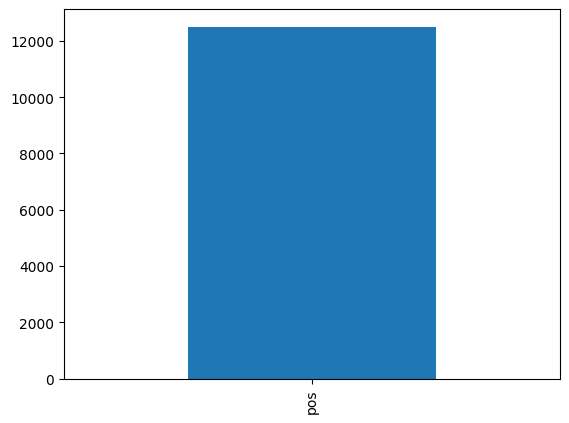

In [24]:
# Class Distribution
print(train_df['label'].value_counts())

# Visualization
train_df['label'].value_counts().plot(kind='bar')

<Axes: >

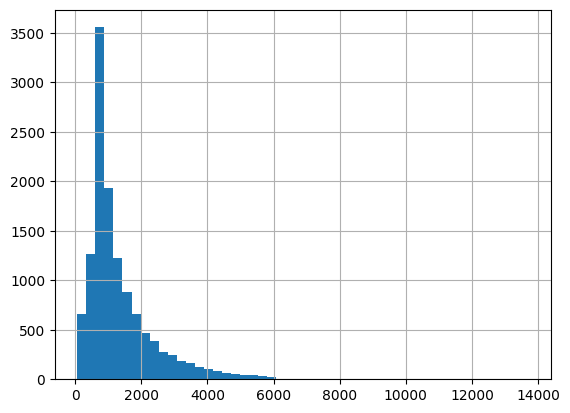

In [25]:
# Text Length Analysis
train_df['review_length'] = train_df['review'].apply(len)
train_df['review_length'].hist(bins=50)

In [26]:
for i in range(5):
  print(f"Review {i+1} ({train_df['label'].iloc[i]}): {train_df['review'].iloc[i][:200]}...")

Review 1 (pos): I never met a single person (out of hundreds) who hated this movie. Bet that anyone who votes it down is a petty saboteur, or a victim of one. This film has everything. Ask yourself, "Are you a fan of...
Review 2 (pos): Most people, when they think of expressionist cinema, look to the b&w German films of the silent and early sound eras--films that emphasized canted angles, extreme contrasts of light and dark, exagger...
Review 3 (pos): Although George C. Scott is the only actor in this version of ACC without a British accent, he more than makes up for it with his over-the-top and larger-than-life interpretation of Ebenezer Scrooge.<...
Review 4 (pos): Since it has been some years since I reviewed this classic I have decided to go back and review it more in dept, but first some insider notes from a movie critic.<br /><br />This animated series is on...
Review 5 (pos): Madhur Bhandarkar goes all out to touch upon taboo issues and gives the most realistic picture of the mo

In [29]:
def clean_text(text):
  # COnvert to lowercase
  text = text.lower()

  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)

  # Remove punctuation ad special characters
  text = re.sub(r'[^a-z0-9\s]', '', text)

  return text

# Apply the preprocessing fuction to your review column
train_df['clean_review'] = train_df['review'].apply(clean_text)


# Check the first few entries of teh clean reviews
print(train_df[['review', 'clean_review']].head())



                                              review  \
0  I never met a single person (out of hundreds) ...   
1  Most people, when they think of expressionist ...   
2  Although George C. Scott is the only actor in ...   
3  Since it has been some years since I reviewed ...   
4  Madhur Bhandarkar goes all out to touch upon t...   

                                        clean_review  
0  i never met a single person out of hundreds wh...  
1  most people when they think of expressionist c...  
2  although george c scott is the only actor in t...  
3  since it has been some years since i reviewed ...  
4  madhur bhandarkar goes all out to touch upon t...  


In [55]:
# Convert string labels to integers
label_to_int = {'pos': 1, 'neg': 0}

In [56]:
# Extract labels from teh DataFrame and cob=nvert them to integers
train_df['label_int'] = train_df['label'].map(label_to_int)

# split teh dataset into training and validation
train_reviews, val_reviews, train_labels, val_labels = train_test_split(
    train_df['clean_review'],
    train_df['label_int'],
    test_size=0.2,
    random_state=13
)

# Define batch size
batch_size = 32

# Convert split data into TensforFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_reviews.values, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((val_reviews.values, val_labels))

# Shuffle, batch, and prefetch teh dataset
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(AUTOTUNE)
validation_dataset = validation_dataset.prefetch(AUTOTUNE)

In [57]:
# Examining the dataset elemets
for features, labels in train_dataset.take(1):
  print(f'Feature batch shape: {features.shape}')
  print(f'Label batch shape: {labels.shape}')
  print(f'Features: {features}')
  print(f'Labels: {labels}')

Feature batch shape: (32,)
Label batch shape: (32,)
Features: [b'this was different thats for sure just look at the cast talk about oddballswilliam h macy and ben stiller were the stars although a bunch of actors almost share the spotlight in this farce about superherowannabees the most outrageous was played by paul reubens of pee wee herman famethere is lots of humor garish colors and no lulls its a pretty entertaining lightweight comedy with nothing but goofy characters all of whom want to be heroes a la superman batman spiderman you name they have talents in strange areas however that the real heroes dont and dont want to its silly but you know that going onits also a film you can watch in installments and not really miss any continuity its a long movie for one so hectic so taking a break here and there is okay the language was tame so kids could enjoy this too in fact i dont recall any swearing in here except the guy in the theater next to me who kept uttering what a dumb fing movi

In [58]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)

Epoch 1/10
313/313 [==============================] - 5s 16ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 2.3781e-04 - val_accuracy: 1.0000
Epoch 2/10
313/313 [==============================] - 4s 13ms/step - loss: 1.5141e-04 - accuracy: 0.9999 - val_loss: 9.2027e-05 - val_accuracy: 1.0000
Epoch 3/10
313/313 [==============================] - 4s 13ms/step - loss: 2.7767e-05 - accuracy: 1.0000 - val_loss: 7.9313e-05 - val_accuracy: 1.0000
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 2.4168e-05 - accuracy: 1.0000 - val_loss: 6.8264e-05 - val_accuracy: 1.0000
Epoch 5/10
313/313 [==============================] - 4s 14ms/step - loss: 2.0940e-05 - accuracy: 1.0000 - val_loss: 5.8386e-05 - val_accuracy: 1.0000
Epoch 6/10
313/313 [==============================] - 5s 16ms/step - loss: 1.8025e-05 - accuracy: 1.0000 - val_loss: 4.9723e-05 - val_accuracy: 1.0000
Epoch 7/10
313/313 [==============================] - 4s 14ms/step - loss: 1.5461e-05 - accuracy: 

In [3]:
import tensorflow as tf
import keras

In [4]:
train_dataset, validation_dataset = tf.keras.utils.text_dataset_from_directory(
    "imdb_data/train",
    validation_split=0.2,
    subset="both",
    seed=13
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [5]:
test_dataset = tf.keras.utils.text_dataset_from_directory(
    "imdb_data/test",
    seed=13
)

Found 25000 files belonging to 2 classes.


# Section 1

Create a Keras `TextVectorization` object called `vectorizer` that represents text as a 5000-word document-term-matrix.

In [6]:
from tensorflow.keras.layers import TextVectorization

# Create the TextVectorization Layer
max_tokens = 10000
output_sequence_length = 300
vectorizer = TextVectorization(max_tokens=max_tokens, output_sequence_length=output_sequence_length)


In [7]:
# Fit the vectorizer to the text data
vectorizer.adapt(train_dataset.map(lambda x, y: x))

# Get the vocabulary
vocabulary = vectorizer.get_vocabulary()
print("Vocabulary size:", len(vocabulary))
print("First five words:", vocabulary[:5])

# Test the vectorization on a sample text
sample_text = "The movie was fantastic!"
vectorized_text = vectorizer([sample_text])
print("Vectorized text:", vectorized_text.numpy())


Vocabulary size: 10000
First five words: ['', '[UNK]', 'the', 'and', 'a']
Vectorized text: [[  2  18  14 792   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0

# Section 2

Adapt `vectorizer` using the training data.

In [8]:
vectorizer.adapt(train_dataset.map(lambda x, y: x))

# Section 3

Create a single-layer, logistic regression model to predict whether a movie review is positive or negative including an early stop.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping

# Define the dimension for the embeddings
embedding_dim = 128  # This is a hyperparameter you can tune

model = Sequential([
    vectorizer,  # The text vectorization layer you previously configured
    Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=embedding_dim, mask_zero=True),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Training the model
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=[early_stopping])


Epoch 1/10
625/625 [==============================] - 12s 19ms/step - loss: 0.5190 - accuracy: 0.7867 - precision: 0.7594 - recall: 0.8363 - val_loss: 0.3629 - val_accuracy: 0.8616 - val_precision: 0.8705 - val_recall: 0.8555
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3019 - accuracy: 0.8856 - precision: 0.8821 - recall: 0.8890 - val_loss: 0.2918 - val_accuracy: 0.8798 - val_precision: 0.8888 - val_recall: 0.8731
Epoch 3/10
625/625 [==============================] - 12s 18ms/step - loss: 0.2358 - accuracy: 0.9104 - precision: 0.9093 - recall: 0.9109 - val_loss: 0.2714 - val_accuracy: 0.8858 - val_precision: 0.8862 - val_recall: 0.8900
Epoch 4/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1960 - accuracy: 0.9288 - precision: 0.9265 - recall: 0.9309 - val_loss: 0.2682 - val_accuracy: 0.8882 - val_precision: 0.8805 - val_recall: 0.9030
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1671 - accuracy: 0

# Section 4

Use the test data to evaluate the accuracy of the model.

In [11]:
# Evaluating the model on the test data
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print (f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")


782/782 [==============================] - 4s 6ms/step - loss: 0.3264 - accuracy: 0.8712 - precision: 0.8722 - recall: 0.8698
Test Loss: 0.32638201117515564
Test Accuracy: 0.8711599707603455
Test Precision: 0.8722021579742432
Test Recall: 0.8697599768638611


**Section 5: Model Parameters**

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 300)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Section 6

Building a model with a 32-unit hidden layer, including an early stop

In [13]:
from keras.api._v2.keras import activations
# Define the dimension for the embeddings
embedding_dim = 128

model = Sequential([
    vectorizer,
    Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=embedding_dim, mask_zero=True),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'), # new 32 unit hidden layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# complie the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Training the model
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=[early_stopping])


Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 0.3967 - accuracy: 0.8278 - precision: 0.7976 - recall: 0.8765 - val_loss: 0.2772 - val_accuracy: 0.8840 - val_precision: 0.8938 - val_recall: 0.8763
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2102 - accuracy: 0.9199 - precision: 0.9185 - recall: 0.9207 - val_loss: 0.2818 - val_accuracy: 0.8826 - val_precision: 0.8775 - val_recall: 0.8943
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1546 - accuracy: 0.9459 - precision: 0.9464 - recall: 0.9447 - val_loss: 0.3226 - val_accuracy: 0.8738 - val_precision: 0.8844 - val_recall: 0.8653


Use the test data to evaluate the accuracy of the model.

In [14]:
test_loss, test_accuracy, test_precision, test_recal = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f'Test Precision; {test_precision}')
print(f"Test Recall: {test_recall}")

782/782 [==============================] - 5s 7ms/step - loss: 0.3778 - accuracy: 0.8584 - precision: 0.8817 - recall: 0.8278
Test Loss: 0.3778133988380432
Test Accuracy: 0.8583599925041199
Test Precision; 0.8817213177680969
Test Recall: 0.8697599768638611


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 300)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1284161 (4.90 MB)
Trainable params: 1284

In [22]:
# Calculating the total number of parameters
total_params = model.count_params()
total_params

1284161

# Section 9

Adding a second hidden layer so that the model has the following layers:
- input_layer
- vectorize_layer
- hidden_layer_1
- hidden_layer_2
- logistic regression

The first hidden layer will have 32 units, the second hidden layer will have 16 units. Both will use a relu activation function.

Train the model and include an early stop.

In [17]:
# Define the dimension for the embeddings
embedding_dim = 128

# Constructing the model
model = Sequential([
    vectorizer,  # Your text vectorization layer
    Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=embedding_dim, mask_zero=True),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),  # First hidden layer with 32 units
    Dense(16, activation='relu'),  # Second hidden layer with 16 units
    Dense(1, activation='sigmoid')  # Output layer for logistic regression
])

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# Training the model with early stopping
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=[early_stopping])

Epoch 1/10
625/625 [==============================] - 13s 19ms/step - loss: 0.3879 - accuracy: 0.8279 - val_loss: 0.2816 - val_accuracy: 0.8762
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2033 - accuracy: 0.9217 - val_loss: 0.2942 - val_accuracy: 0.8786
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1471 - accuracy: 0.9480 - val_loss: 0.3443 - val_accuracy: 0.8694


# Section 10

Using the test data to evaluate the accuracy of the model.

In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f'Test Precision; {test_precision}')
print(f"Test Recall: {test_recall}")


782/782 [==============================] - 5s 6ms/step - loss: 0.4053 - accuracy: 0.8558
Test Loss: 0.40531641244888306
Test Accuracy: 0.8557999730110168
Test Precision; 0.8817213177680969
Test Recall: 0.8697599768638611


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 300)               0         
 ctorization)                                                    
                                                                 
 embedding_2 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

**Accuracy**: The test accuracy is very close to the validation accuracy, suggesting that the model's performance is consistent across different sets of unseen data.

**Performance:** The performance has not significantly changed compared to the previous model with a single hidden layer, suggesting that the addition of the second hidden layer did not overcomplicate the model for this particular task.

# Section 11

The model now has 644,673 paramaters